<a href="https://www.kaggle.com/code/mahendra77/e-commerce-text-classification?scriptVersionId=150504639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## ignore warning message
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


In [2]:
## import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# load lang
import spacy
nlp = spacy.load("en_core_web_lg")

In [3]:
## Load CSV file
data  = pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv',header=None)
data.columns =['label','text']

In [4]:
# top 5 rows
data.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [5]:
## null values
data.isnull().sum()

label    0
text     1
dtype: int64

In [6]:
## is duplicates
data.duplicated().sum()

22622

In [7]:
## descriptive statistics
data.describe()

,label,text
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [8]:
# drop null values
data.dropna(inplace=True)

In [9]:
# drop duplicates 
data.drop_duplicates(inplace=True)

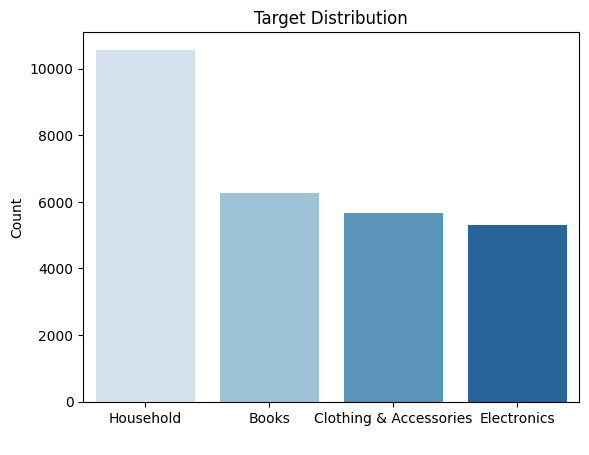

In [10]:
## distribution of label in dataset
sns.countplot(x='label',data=data,palette='Blues')
plt.xlabel(' ')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

## Text Normalization

It is Process of Cleaning and Preprocessing Text inorder to use in various NLP Tasks.

Process includes Several Techniques and they are:
1. Case Normalization
2. Punctuation Removal
3. Stop Word Removal
4. Stemming/Lemmatization
5. Tokenization
6. Converting abbr and synonyms to their full forms. so many ...

Each technique has it's Adavantages(reduce the dimensionality,speed up process) and Disadvantages (i.e. Information Loss). 


In [11]:
## remove punctuations
import string

def remove_punct(text):
    
    punctuations =string.punctuation
    mytokens = ''.join(word for word in text if word not in punctuations)
    
    return mytokens

In [12]:
## remove stopwords

from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(text):
    
    # gives us list stopword in english
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    
    # add more stop if requried based on domain knowledge 
    #  stop_words + = ['remove','item','rich']
    
    mytokens = [word for word in text if word not in stop_words]
    
    return mytokens

In [13]:
## tokenization + lemmatization
nlp.max_length = 19461259

def tokenization(text):
    
    token = nlp(text)
    
    ## lemma 
    token = [word.lemma_ for word in token]
    
    ## convert tokens into lower case
    token = [ word.lower() for word in token]
    
    return token
    

In [14]:
def text_norm(text):
        
    punct_text = remove_punct(text)
    
    tokens = tokenization(punct_text)
    
    final_tokens = remove_stopwords(tokens)
    
    return final_tokens

## Feature Engneering

In NLP Feature Engineering involves transformaing textual data to Numerical Features, inorder to feed them to ML Models.

Techniques are
1. N-grams [ which help to capture the context and helps in improving text understanding of the Model]
2. POS Tagging
3. Named Entity Recognization
4. Bag of Words [ Count Vectorizer]
5. TF-IDF 
6. Word Embeddings for Adavanced Models

Each Technique is used based on the Task requirement
* PoS Tagging, NER, Parsing  -- for knowing structure of the language
* CV,TF-IDF                  -- have a large corpus and want to simplify them into fewer words 
* Word Embeddings            -- to know semantics of the language

In [15]:
## CountVectorizer
'''
   min_df : is used for removing data values that appear too infrequently.
   max_df : is used for removing data values that appear too frequently.
   
   max_df = 9   means remove the words that appear in more than 9 documents
   max-df =0.90 means remove the words that appear in more tahn 90% documents
'''
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(tokenizer=text_norm,max_df=0.9,min_df=2,ngram_range=(1,1))

In [16]:
## TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(min_df=2,max_df=0.90,tokenizer=text_norm,ngram_range=(1,1))

## Model Training

In [17]:
# pipeline creation
from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# spliting dataset
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [18]:
# train:test = 70:30
X = data['text'] 
y = data['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Count Vectorizer + Logistic Regression  

 
                        precision    recall  f1-score   support

                 Books       0.92      0.95      0.93      1922
Clothing & Accessories       0.97      0.96      0.96      1757
           Electronics       0.93      0.90      0.91      1557
             Household       0.94      0.95      0.94      3105

              accuracy                           0.94      8341
             macro avg       0.94      0.94      0.94      8341
          weighted avg       0.94      0.94      0.94      8341



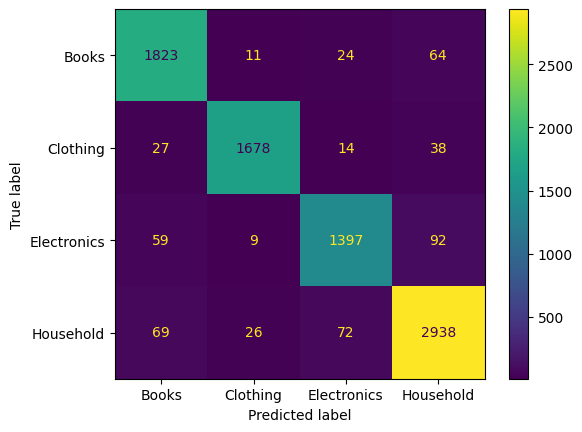

In [19]:
print("Count Vectorizer + Logistic Regression  \n\n ")
## create a pipeline using Count Vectorizer
pipe_bow = Pipeline([('vectorizer', bow_vectorizer),
                    ('classifier', LogisticRegression())])

## fit data
pipe_bow.fit(X_train,y_train)
y_pred_bow = pipe_bow.predict(X_test)

print(classification_report(y_test,y_pred_bow))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bow),display_labels=['Books','Clothing','Electronics','Household']).plot()

TF_IDF + Logistic Regression  

 
                        precision    recall  f1-score   support

                 Books       0.96      0.94      0.95      1922
Clothing & Accessories       0.98      0.96      0.97      1757
           Electronics       0.95      0.91      0.93      1557
             Household       0.93      0.97      0.95      3105

              accuracy                           0.95      8341
             macro avg       0.95      0.94      0.95      8341
          weighted avg       0.95      0.95      0.95      8341



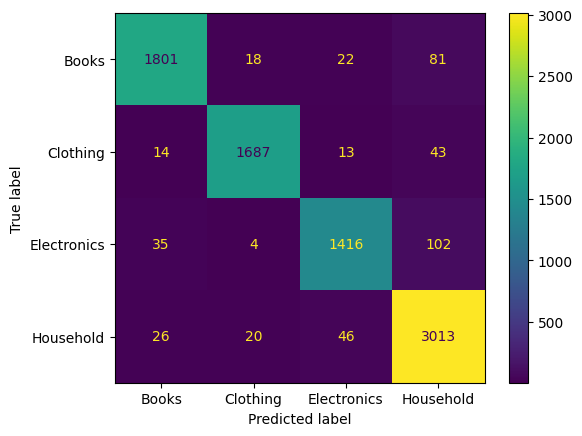

In [20]:
print("TF_IDF + Logistic Regression  \n\n ")
## create a pipeline using TF-IDF
pipe_tf = Pipeline([
                    ('vectorizer', tf_idf),
                    ('classifier', LogisticRegression())])

## fit data
pipe_tf.fit(X_train,y_train)
y_pred_tf = pipe_tf.predict(X_test)

print(classification_report(y_test,y_pred_tf))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tf),display_labels=['Books','Clothing','Electronics','Household']).plot()

TF-IDF + SVM 


                        precision    recall  f1-score   support

                 Books       0.97      0.94      0.95      1922
Clothing & Accessories       0.98      0.96      0.97      1757
           Electronics       0.95      0.92      0.94      1557
             Household       0.93      0.98      0.95      3105

              accuracy                           0.95      8341
             macro avg       0.96      0.95      0.95      8341
          weighted avg       0.95      0.95      0.95      8341



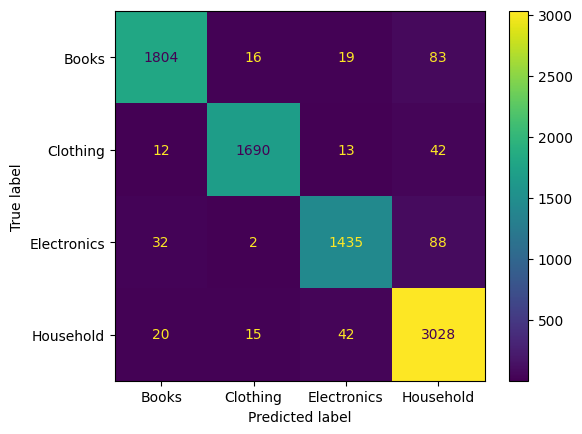

In [21]:
print("TF-IDF + SVM \n\n")
pipe_tf_svm = Pipeline([
                    ('vectorizer', tf_idf),
                    ('classifier', SVC())])

# fit 
pipe_tf_svm.fit(X_train,y_train)
y_pred_svm = pipe_tf_svm.predict(X_test)

print(classification_report(y_test,y_pred_svm))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svm),display_labels=['Books','Clothing','Electronics','Household']).plot()